In [32]:
import mplfinance as mpf
import matplotlib as mpl
from cycler import cycler
import pandas as pd
import matplotlib.pyplot as plt
import time

In [33]:
daytime = time.strftime("%Y.%m.%d", time.localtime()) 
#dfAll = pd.read_csv('industrystock'+daytime+'.csv')
dfAll = pd.read_csv('stock'+daytime+'shK.csv')
#dfAll = pd.read_csv('stock'+daytime+'shK.csv')
dfAll.head()

,日期,开盘价,收盘价,最高价,最低价,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,股票编号
0,2019-11-08,27.60,30.44,33.13,26.96,262044,779698602.0,49.20,142.74,17.90,70.89,688166
1,2019-11-11,30.03,32.24,33.33,29.93,151579,483402594.0,11.17,5.91,1.80,41.01,688166
2,2019-11-12,31.43,28.04,31.43,27.89,110284,320441224.0,10.98,-13.03,-4.20,29.83,688166
3,2019-11-13,28.03,28.51,29.11,27.34,63258,180876042.0,6.31,1.68,0.47,17.11,688166
4,2019-11-14,28.03,28.41,30.33,27.69,62991,185045178.0,9.26,-0.35,-0.10,17.04,688166


In [34]:
#处理数据
dfAll.rename(columns = {
    '日期':'Date',
    '开盘价':'Open',
    '最高价':'High',
    '最低价':'Low',
    '收盘价':'Close',
    '成交量':'Volume'
},inplace=True)
length = len(dfAll)
# for i in range(0, length):
#     d = str(int(dfAll.loc[i][0]))
#     d = d[0:4]+"-"+d[4:6]+"-"+d[6:8]
#     dfAll.loc[i,"Date"]=d
dfAll['Date'] =pd.to_datetime(dfAll['Date'])
dfAll.head()

,Date,Open,Close,High,Low,Volume,成交额,振幅,涨跌幅,涨跌额,换手率,股票编号
0,2019-11-08,27.60,30.44,33.13,26.96,262044,779698602.0,49.20,142.74,17.90,70.89,688166
1,2019-11-11,30.03,32.24,33.33,29.93,151579,483402594.0,11.17,5.91,1.80,41.01,688166
2,2019-11-12,31.43,28.04,31.43,27.89,110284,320441224.0,10.98,-13.03,-4.20,29.83,688166
3,2019-11-13,28.03,28.51,29.11,27.34,63258,180876042.0,6.31,1.68,0.47,17.11,688166
4,2019-11-14,28.03,28.41,30.33,27.69,62991,185045178.0,9.26,-0.35,-0.10,17.04,688166


In [35]:
#classify = dfAll["行业编号"].unique()
classify = dfAll["股票编号"].unique()
print(classify)
industryid = 688166

[688166 688590 688488 600397 600463 603101 600250 600123 600476 603106
 603337 603958 603176 600866 605398 600706 605319 600847 600756 688173]


In [41]:
#df = dfAll[dfAll["行业编号"].isin([industryid])].reset_index(drop=True)
df = dfAll[dfAll["股票编号"].isin([industryid])].reset_index(drop=True)


In [59]:
df.set_index("Date",inplace=True,drop=False)
df
df=df.tail(100)

In [60]:
# 设置基本参数
# type:绘制图形的类型，有candle, renko, ohlc, line等
# 此处选择candle,即K线图
# mav(moving average):均线类型,此处设置7,30,60日线
# volume:布尔类型，设置是否显示成交量，默认False
# title:设置标题
# y_label:设置纵轴主标题
# y_label_lower:设置成交量图一栏的标题
# figratio:设置图形纵横比
# figscale:设置图形尺寸(数值越大图像质量越高)
kwargs = dict(
    type='candle', 
    mav=(7, 30, 60), 
    volume=True, 
    title='\nA_stock %s candle_line' % (industryid),    
    ylabel='OHLC Candles', 
    ylabel_lower='Shares\nTraded Volume', 
    figratio=(15, 10), 
    figscale=5)

In [61]:
# 设置marketcolors
# up:设置K线线柱颜色，up意为收盘价大于等于开盘价
# down:与up相反，这样设置与国内K线颜色标准相符
# edge:K线线柱边缘颜色(i代表继承自up和down的颜色)，下同。详见官方文档)
# wick:灯芯(上下影线)颜色
# volume:成交量直方图的颜色
# inherit:是否继承，选填
mc = mpf.make_marketcolors(
    up='red', 
    down='green', 
    edge='i', 
    wick='i', 
    volume='in', 
    inherit=True)


In [62]:
# 设置图形风格
# gridaxis:设置网格线位置
# gridstyle:设置网格线线型
# y_on_right:设置y轴位置是否在右
s = mpf.make_mpf_style(
    gridaxis='both', 
    gridstyle='-.', 
    y_on_right=False, 
    marketcolors=mc)


In [63]:
# 设置均线颜色，配色表可见下图
# 建议设置较深的颜色且与红色、绿色形成对比
# 此处设置七条均线的颜色，也可应用默认设置
mpl.rcParams['axes.prop_cycle'] = cycler(
    color=['dodgerblue', 'deeppink', 
    'navy', 'teal', 'maroon', 'darkorange', 
    'indigo'])

In [64]:
# 设置线宽
mpl.rcParams['lines.linewidth'] = 2


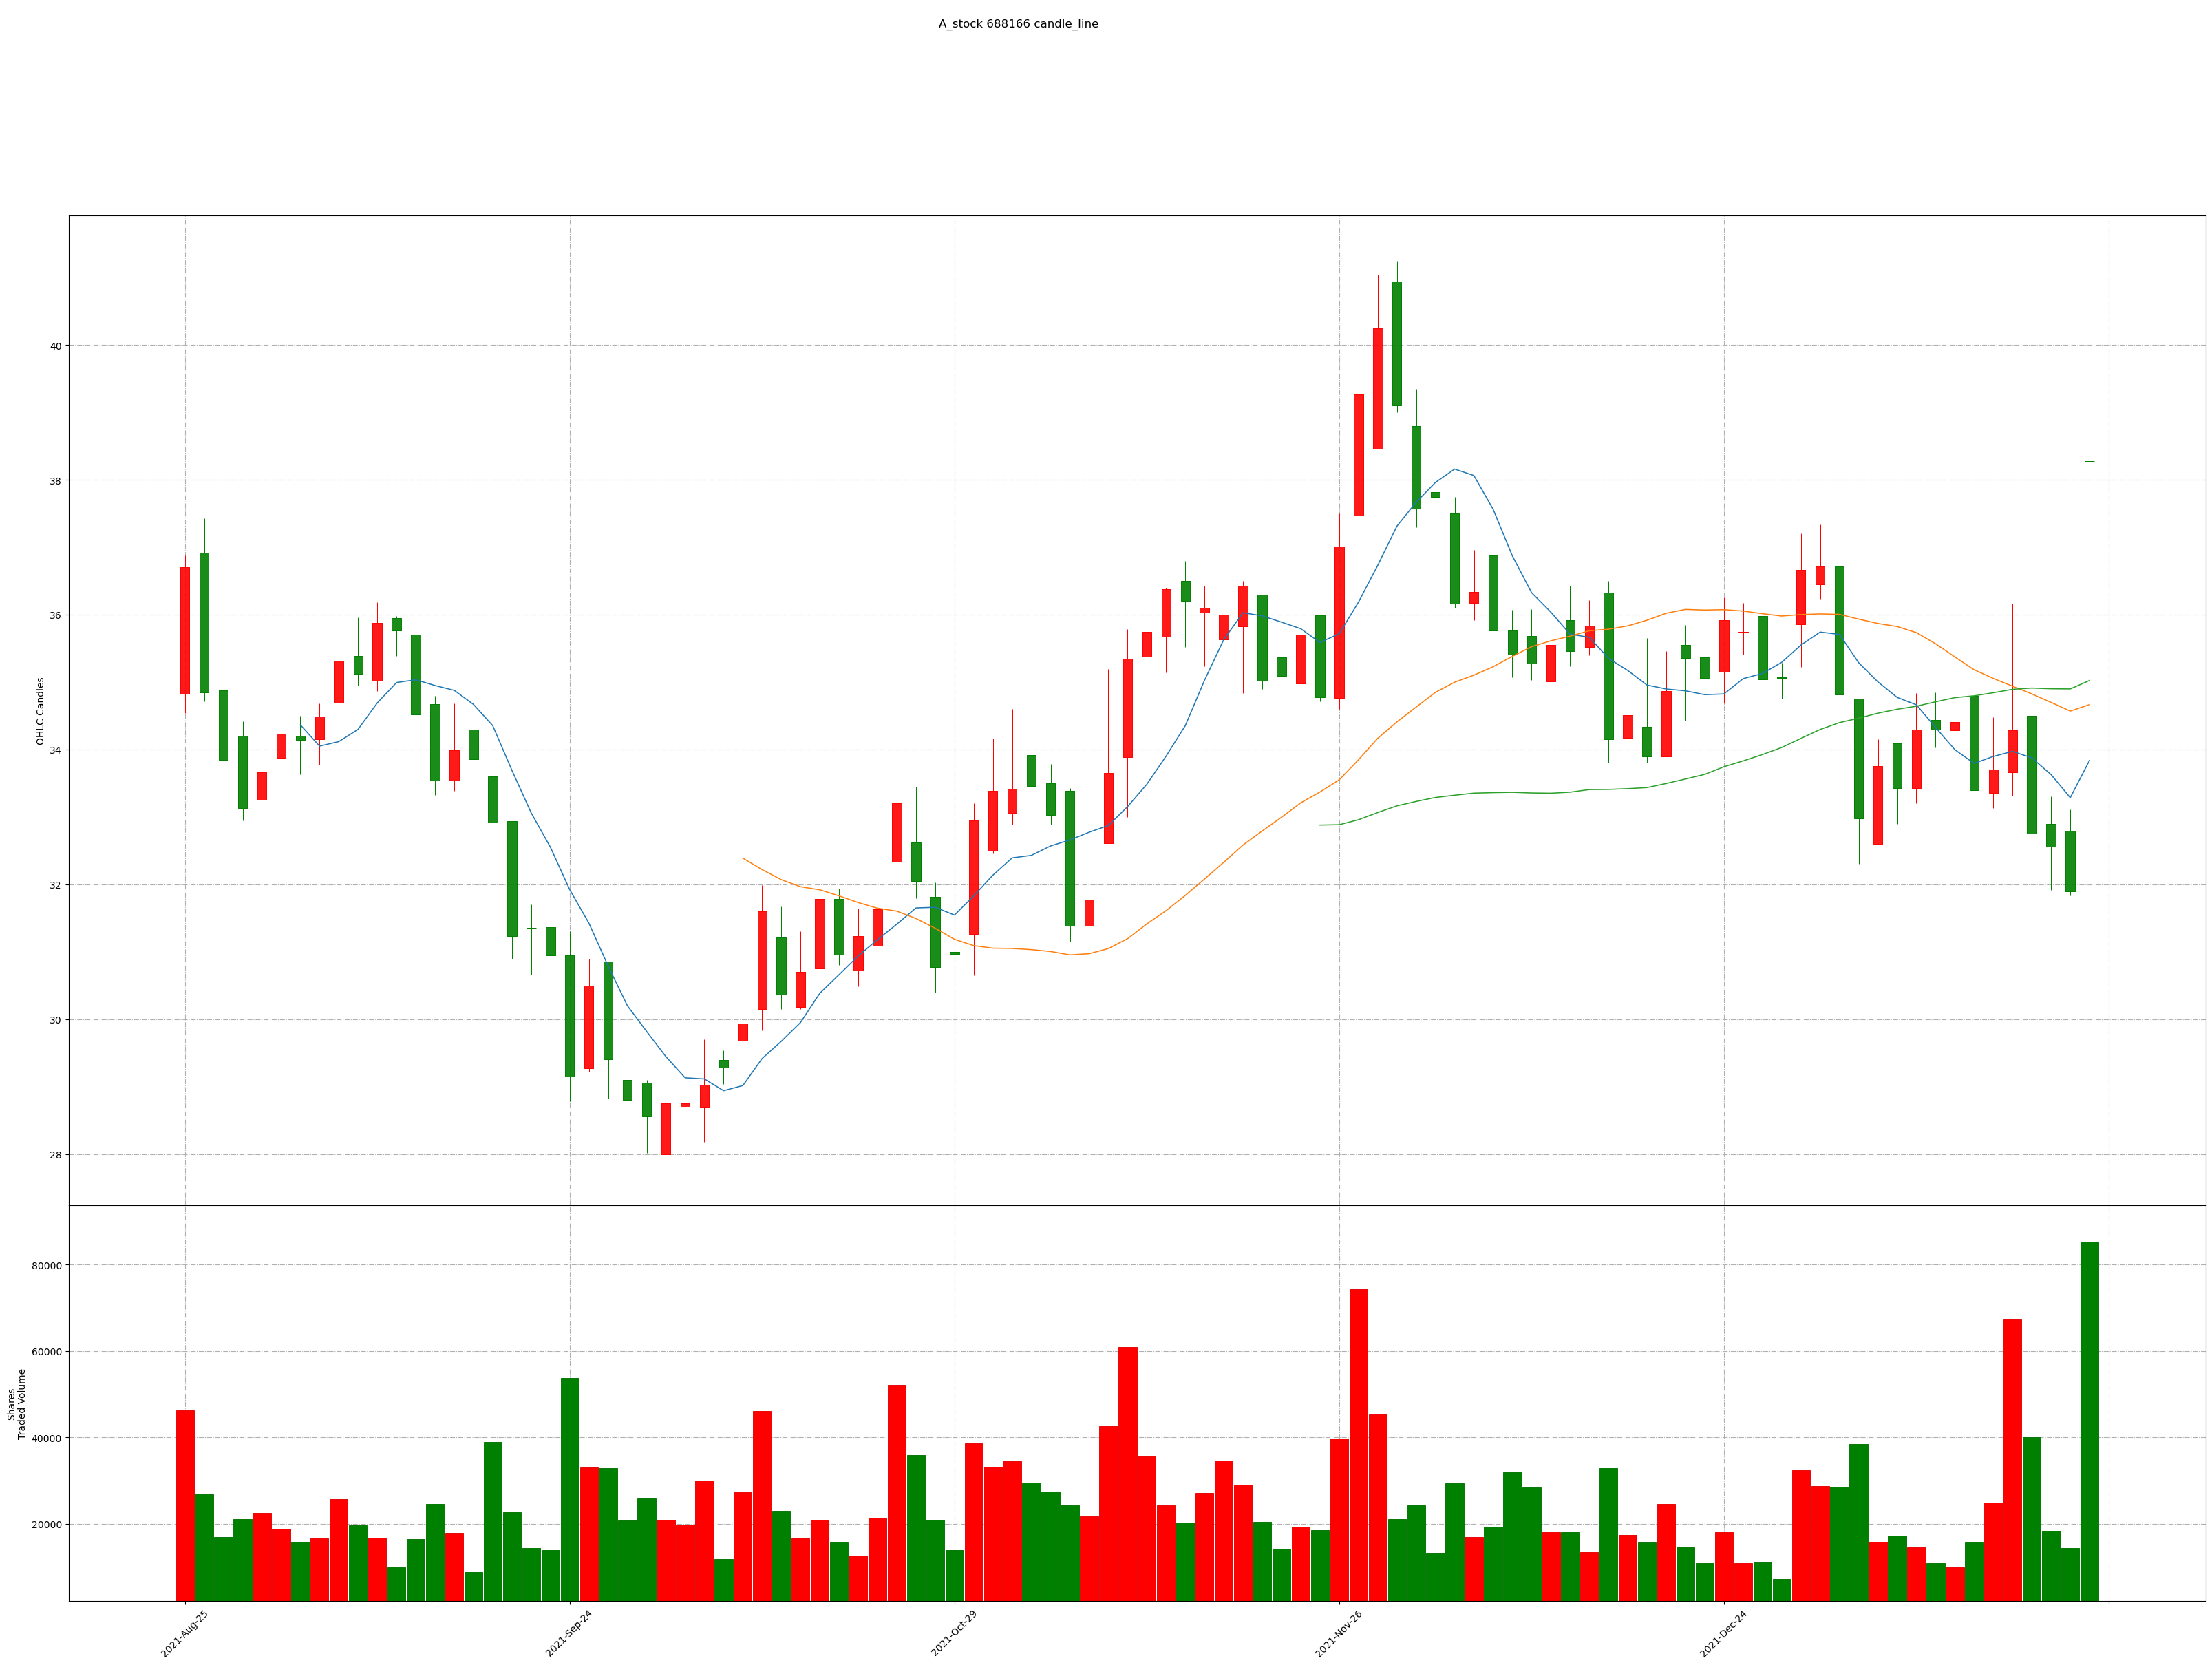

In [65]:
# 图形绘制
# show_nontrading:是否显示非交易日，默认False
# savefig:导出图片，填写文件名及后缀
mpf.plot(df, 
    **kwargs, 
    style=s, 
    show_nontrading=False,
    #savefig='A_stock-%s %s_candle_line'% (industryid, period) + '.jpg'
        )
plt.show()
mpf.show()